


Codez l’algorithme de KNN sous forme une fonction (def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs)) qui :
Calcul la distance entre Data de test et Data d’apprentissage.
Trouve la/les distances plus proche de « k » voisins.
Classe Data de test selon la classe majoritaire de « k » voisins.
Retourne la classe de Data Test.
Réalisez des expérimentations en variant la distance et le nombre de « k ».
Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt


filenames = glob.glob("./DataSet" + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

df


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Score,Interpretation
0,a,a,a,a,a,1,1,1,1,1,10,B
1,b,b,b,b,b,2,2,2,2,2,0,C
2,c,c,c,c,c,3,3,3,3,3,20,A
3,a,b,c,a,b,1,2,3,1,2,8,C
4,b,c,a,c,a,3,2,3,1,2,11,B
...,...,...,...,...,...,...,...,...,...,...,...,...
188,c,c,NaN,c,c,NaN,NaN,3.0,3,3,14,B
189,b,a,c,NaN,b,NaN,2.0,NaN,3,2,5,C
190,a,c,b,NaN,NaN,1.0,NaN,3.0,2,3,8,C
191,a,n,e,a,b,v,t,Y,',1,3,C


In [2]:
y=df['Interpretation']
y=np.array(y)
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)+1
print(y)

[2 3 1 3 2 2 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 2 3
 2 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 2 2
 2 3 2 2 2 3 3 3 3 2 2 3 2 3 3 3 2 3 2 2 2 3 2 2 2 2 2 2 3 2 3 2 3 2 2 3 3
 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 2 2
 1 3 3 3 2 3 3 2 3 3 2 1 2 3 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2
 1 2 3 2 3 3 3 3]


In [3]:
df.info() 
df.head(5) 
df.shape 
df.columns 
df["Q1"].nunique() 
df["Q1"].unique() 
df.columns.nunique() 
df['Score'].value_counts() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Q1              185 non-null    object
 1   Q2              181 non-null    object
 2   Q3              180 non-null    object
 3   Q4              184 non-null    object
 4   Q5              180 non-null    object
 5   Q6              182 non-null    object
 6   Q7              185 non-null    object
 7   Q8              183 non-null    object
 8   Q9              185 non-null    object
 9   Q10             186 non-null    object
 10  Score           193 non-null    int64 
 11  Interpretation  193 non-null    object
dtypes: int64(1), object(11)
memory usage: 18.2+ KB


8     27
10    24
9     21
6     18
7     17
0     13
11    10
12     9
5      8
14     7
4      6
3      5
13     5
20     5
1      5
17     4
2      4
16     3
19     2
Name: Score, dtype: int64

In [4]:
print(df.isna().sum())

Q1                 8
Q2                12
Q3                13
Q4                 9
Q5                13
Q6                11
Q7                 8
Q8                10
Q9                 8
Q10                7
Score              0
Interpretation     0
dtype: int64


## Remplacement des valeurs erronées et manquantes par des valeurs qui n'influenceront pas le score. D'après le code Python, ces valeurs sont b ou 2. 

In [5]:
df_lettre=df[["Q1","Q2","Q3","Q4","Q5"]]
df_lettre=df_lettre.replace({'A':'a', 'B': 'b', 'C': 'c'})
df_lettre=df_lettre[df_lettre.isin(["a","b","c"])]
# print(df_lettre.mode())
df_lettre= df_lettre.fillna(df_lettre.mode().iloc[0])
# df_lettre= df_lettre.fillna('b')
print(df_lettre)
print(df_lettre.isna().sum())

    Q1 Q2 Q3 Q4 Q5
0    a  a  a  a  a
1    b  b  b  b  b
2    c  c  c  c  c
3    a  b  c  a  b
4    b  c  a  c  a
..  .. .. .. .. ..
188  c  c  c  c  c
189  b  a  c  c  b
190  a  c  b  c  a
191  a  b  c  a  b
192  a  b  c  c  a

[193 rows x 5 columns]
Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
dtype: int64


In [6]:
le = preprocessing.LabelEncoder()
for i in df_lettre:
    df_lettre[i]=le.fit_transform(df_lettre[i])+1

print(df_lettre,df.shape)

     Q1  Q2  Q3  Q4  Q5
0     1   1   1   1   1
1     2   2   2   2   2
2     3   3   3   3   3
3     1   2   3   1   2
4     2   3   1   3   1
..   ..  ..  ..  ..  ..
188   3   3   3   3   3
189   2   1   3   3   2
190   1   3   2   3   1
191   1   2   3   1   2
192   1   2   3   3   1

[193 rows x 5 columns] (193, 12)


In [7]:
df_num=df[["Q6","Q7","Q8","Q9","Q10"]]
df_num=df_num[df_num.isin(["1","2","3"])]
df_num=df_num.replace({'1':1, '2': 2, '3': 3})

df_num= df_num.fillna(2)

print(df_num)
print(df_num.isna().sum())

      Q6   Q7   Q8   Q9  Q10
0    2.0  2.0  2.0  2.0  2.0
1    2.0  2.0  2.0  2.0  2.0
2    2.0  2.0  2.0  2.0  2.0
3    2.0  2.0  2.0  2.0  2.0
4    2.0  2.0  2.0  2.0  2.0
..   ...  ...  ...  ...  ...
188  2.0  2.0  2.0  3.0  2.0
189  2.0  2.0  2.0  3.0  2.0
190  2.0  2.0  2.0  2.0  2.0
191  2.0  2.0  2.0  2.0  2.0
192  2.0  2.0  2.0  2.0  2.0

[193 rows x 5 columns]
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
dtype: int64


In [8]:
print (df_num)

      Q6   Q7   Q8   Q9  Q10
0    2.0  2.0  2.0  2.0  2.0
1    2.0  2.0  2.0  2.0  2.0
2    2.0  2.0  2.0  2.0  2.0
3    2.0  2.0  2.0  2.0  2.0
4    2.0  2.0  2.0  2.0  2.0
..   ...  ...  ...  ...  ...
188  2.0  2.0  2.0  3.0  2.0
189  2.0  2.0  2.0  3.0  2.0
190  2.0  2.0  2.0  2.0  2.0
191  2.0  2.0  2.0  2.0  2.0
192  2.0  2.0  2.0  2.0  2.0

[193 rows x 5 columns]


In [9]:
df = pd.concat((df_lettre, df_num), axis=1)
x=np.array(df)
# y=y.reshape(len(y),1)
all=np.column_stack((x,y))
print(x,x.shape)
print(y,y.shape)

[[1. 1. 1. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [3. 3. 3. ... 2. 2. 2.]
 ...
 [1. 3. 2. ... 2. 2. 2.]
 [1. 2. 3. ... 2. 2. 2.]
 [1. 2. 3. ... 2. 2. 2.]] (193, 10)
[2 3 1 3 2 2 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 3 2 3 3 3 3 3 3 2 3 3 3 3 3 2 3
 2 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 2 3 3 2 3 3 3 3 2 2
 2 3 2 2 2 3 3 3 3 2 2 3 2 3 3 3 2 3 2 2 2 3 2 2 2 2 2 2 3 2 3 2 3 2 2 3 3
 3 3 3 2 2 2 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 2 2
 1 3 3 3 2 3 3 2 3 3 2 1 2 3 3 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 3 3 3 2 2
 1 2 3 2 3 3 3 3] (193,)


#### Fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [10]:
import math
# Calcul de la distance entre 2 vecteurs
metric='Manhattan'
def calc_distance(point_1, point_2,metric):
    euclidean_distance = 0
    manhattan_distance = 0
    minkowski_distance= 0
    p=3
    if metric =='Euclidean':
        for i in range(len(point_1)-1):
            
            euclidean_distance += ((point_1[i] - point_2[i])**2)
        return euclidean_distance**(1/2)
    
    elif metric=='Manhattan':
        for i in range(len(point_1)-1):
            manhattan_distance += (abs(point_1[i] - point_2[i]))
        return(manhattan_distance)
    
    elif metric=='Minkowski':
        for i in range(len(point_1)-1):
            minkowski_distance += (abs(point_1[i] - point_2[i]))**p
        return(minkowski_distance**(1/p))
new=x[1]
ref=x[12]
print(new, '\n',ref)   
calc_distance(new,ref,metric) #exemple de calcul de distance entre 2 points

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 
 [2. 1. 1. 1. 1. 2. 2. 3. 2. 2.]


5.0

In [11]:

# Trouve les voisins les plus proches
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = calc_distance(test_row, train_row,metric)
        distances.append((train_row, dist))
    distances.sort(key=lambda x: x[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
get_neighbors(x,x[10],3) # exemple de voisins proches

[array([1., 3., 1., 1., 3., 3., 2., 2., 2., 3.]),
 array([1., 3., 3., 1., 3., 3., 2., 2., 2., 2.]),
 array([1., 3., 1., 1., 1., 2., 2., 2., 2., 2.])]

In [12]:
def predict_classification(train, test_row, num_neighbors):
    classe = None
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    if prediction == 1.0:
        classe = 1
    elif prediction == 2.0:
        classe = 2
    elif prediction == 3.0:
        classe = 3
    return (classe)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
num=7
err=0
count=0
for i in x_test:
    
    y_pred=predict_classification(x_train,i,num) 
    if y_pred!=y_test[count] :
        err+=1
    print(y_pred,y_test[count])
    count+=1
print(len(x_test),err)
acc=(len(x_test)-err)/(len(x_test))
print(acc)

2 3
2 2
2 3
2 3
2 2
2 3
2 3
2 2
2 2
2 3
2 2
2 1
2 1
2 3
2 3
2 2
2 3
2 2
2 3
2 3
2 3
2 2
2 3
2 3
2 3
2 3
2 2
2 2
2 2
2 3
2 2
2 2
2 3
2 2
2 3
2 3
2 3
2 2
2 3
39 24
0.38461538461538464


In [14]:
from sklearn import neighbors

# score = []
# best_k = 1
# best_score = 0

# for k in range(best_k, 20):
#     model = neighbors.KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train, y_train)
#     score.append(model.score(x_train, y_train))
    
#     if best_score < model.score(x_train, y_train):
#         best_k = k
#         best_score = model.score(x_train, y_train)

# print(best_k)
# plt.plot(score)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\utilisateur

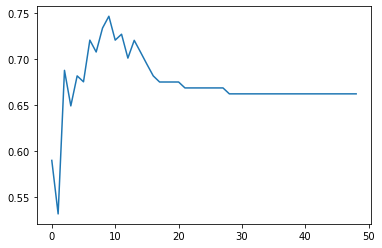

In [15]:
from sklearn.model_selection import cross_val_score
model = neighbors.KNeighborsClassifier()

val_score = []
for k in range(1, 50):
    score = cross_val_score(neighbors.KNeighborsClassifier(k), x_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [16]:
knn= neighbors.KNeighborsClassifier(5)
knn.fit(x_train,y_train)
knn.score(x_train, y_train)

0.7662337662337663

In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train, y_train)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.7468817204301075
{'metric': 'euclidean', 'n_neighbors': 10}


In [19]:
model = grid.best_estimator_
model.score(x_test, y_test)

0.5384615384615384